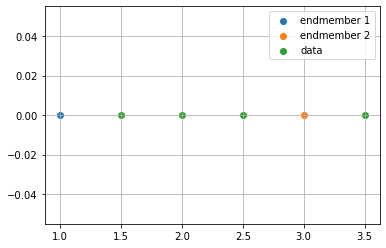

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
e1=np.array([1])
xaxis=np.array([0])
x=np.array([1.5,2,2.5,3.5])
plt.scatter(e1,xaxis,label='endmember 1')
e2=np.array([3])
xaxis=np.array([0])
plt.scatter(e2,xaxis,label='endmember 2')
xaxis=np.array([0,0,0,0])
plt.scatter(x,xaxis,label='data')
plt.legend()
plt.grid()

In [27]:
x=np.array([1.5,2,2.5,3.5])
P=np.zeros((4,2))
E=np.array([1,3])
for w in range(1):
    for i in range(len(x)):
        A=np.array([E,[1,1]])
        r=np.array([x[i],1])
        p=np.linalg.inv(A)@r
        P[i,:]=p
        P[P>1]=1
        P[P<0]=0
    mu=0.001
    M=2
    N=4
    lamda= (N*mu)/((M-1)*(1-mu))
    E=np.linalg.inv(P.T@P+lamda*(np.eye(M)-(np.ones((M,M))/(M))))@P.T@x
E

array([0.76034414, 3.34379352])

In [61]:
x=np.array([1.5,2,2.5,3.5,4.5,5.5])
xaxis=np.array([0,0,0,0,0,0])
P=np.zeros((6,2))
E=np.array([2.5,3])
filenames = []
for i in range(10):
    
    # plot the line chart
    plt.plot(np.array([0,1,2,3,4,5,6]),np.array([0,0,0,0,0,0,0]),'|k')
    plt.plot(np.array([0,1,2,3,4,5,6]),np.array([0,0,0,0,0,0,0]),'--k')
    plt.plot(E[0],np.array([0]),'dr',label='endmember 1')
    plt.plot(E[1],np.array([0]),'db',label='endmember 2')
    plt.plot(x,xaxis,'xg',label='data')
    
    plt.legend()
    # create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename)
    plt.close()
    for i in range(len(x)):
        A=np.array([E,[1,1]])
        r=np.array([x[i],1])
        p=np.linalg.inv(A)@r
        P[i,:]=p
        P[P>1]=1
        P[P<0]=0
    mu=0.001
    M=2
    N=6
    lamda= (N*mu)/((M-1)*(1-mu))
    E=np.linalg.inv(P.T@P+lamda*(np.eye(M)-(np.ones((M,M))/(M))))@P.T@x
# build gif
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

In [57]:
E

array([1.50633225, 5.45306257])

In [31]:
mu=0.01
M=2
N=4
x=np.array([1.5,2,2.5,3.5])
E=np.array([1,3])
P=np.array([[0.75,0.5,0.25,0],[0.25,0.5,0.75,1]]).T
P.T@P
lamda= (N*mu)/((M-1)*(1-mu))
np.linalg.inv(P.T@P+lamda*(np.eye(M)-(np.ones((M,M))/(M))))@P.T@x

array([0.84867173, 3.29079696])

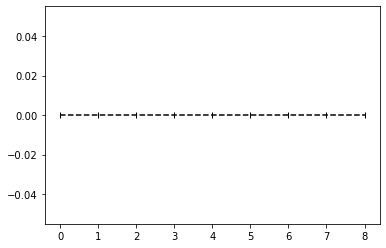

Random 2D data

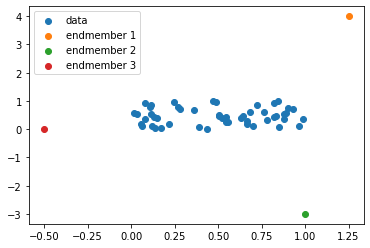

In [4]:
data=np.random.rand(50,2)
plt.scatter(data[:,0],data[:,1],label='data')
plt.scatter(1.25,4,label='endmember 1')
plt.scatter(1,-3,label='endmember 2')
plt.scatter(-0.5,0,label='endmember 3')
plt.legend()